In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import RFE
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("C:/Users/17326/OneDrive - go.Stockton.edu/Documents/dssa/fetal_health.csv")

In [3]:
#defining features and target variable
X = df.drop(["fetal_health"], axis= 1)
y = df["fetal_health"]

In [4]:
#Stanadrdizing the data
col_names = list(X.columns)
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)
X_Scaled = pd.DataFrame(X_Scaled, columns = col_names)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y, test_size =0.2, random_state=42) #80/20 training test split

In [6]:
#creating random forest classifier and fitting the model to training set

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# make predictions on the test set
y_pred = rf_model.predict(X_test)

# evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9460093896713615
Classification Report:
               precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       333
         2.0       0.88      0.78      0.83        64
         3.0       0.93      0.93      0.93        29

    accuracy                           0.95       426
   macro avg       0.92      0.90      0.91       426
weighted avg       0.94      0.95      0.94       426

Confusion Matrix:
 [[326   6   1]
 [ 13  50   1]
 [  1   1  27]]


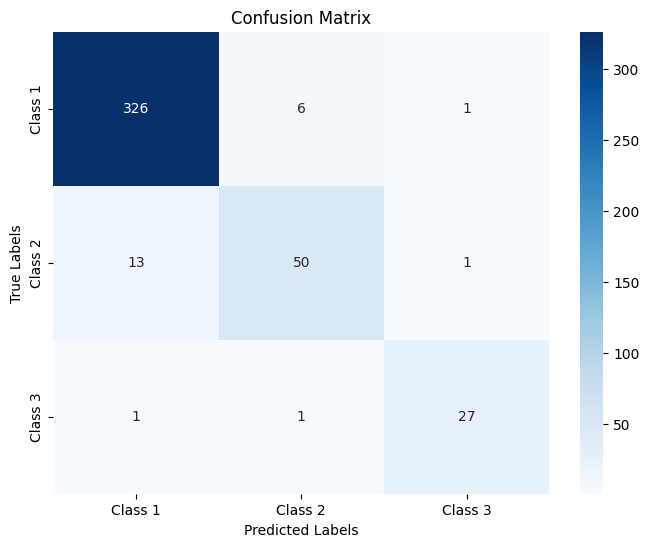

In [14]:
# Assuming you have your confusion matrix stored as a numpy array

# Create a list of class labels (replace these with your actual class labels)
class_labels = ['Class 1', 'Class 2', 'Class 3']

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [9]:
#create RFE to rank features 
rfe = RFE(estimator=rf_model, n_features_to_select=1)
rfe.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=1)

In [11]:
ranking_df = pd.DataFrame({'Feature' : X.columns, 'Ranking' : rfe.ranking_})
ranking_df = ranking_df.sort_values(by='Ranking', ascending=True)
print(ranking_df)


                                              Feature  Ranking
17                                     histogram_mean        1
7                     abnormal_short_term_variability        2
8                mean_value_of_short_term_variability        3
9   percentage_of_time_with_abnormal_long_term_var...        4
10                mean_value_of_long_term_variability        5
18                                   histogram_median        6
0                                      baseline value        7
16                                     histogram_mode        8
11                                    histogram_width        9
1                                       accelerations       10
6                            prolongued_decelerations       11
12                                      histogram_min       12
3                                uterine_contractions       13
13                                      histogram_max       14
19                                 histogram_variance  